In [2]:
import pandas as pd

from skimpy import skim # visualizar estatísticas descritivas de um dataframe

import missingno as msno # visualizar graficamente os dados ausentes em um dataframe

In [3]:
df = pd.read_csv('spotify_songs_dataset.csv')

df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


### Especificando algumas colunas

- duration: em segundos
- popularity: score (1 a 100)
- stream: número total de streams da música

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [5]:
df.describe()

,duration,popularity,stream
count,45000.000000,50000.000000,5.000000e+04
mean,239.659178,50.783440,5.019183e+07
std,50.136727,28.948749,2.893624e+07
min,33.000000,1.000000,1.899000e+03
25%,206.000000,26.000000,2.523311e+07
50%,240.000000,51.000000,5.042169e+07
75%,273.000000,76.000000,7.519064e+07
max,433.000000,100.000000,9.999913e+07


In [6]:
df.describe(include="object").T

,count,unique,top,freq
song_id,50000,50000,SP0001,1
song_title,50000,46396,Fund.,12
artist,50000,40182,Michael Smith,23
album,50000,26162,Success.,45
genre,50000,9,Electronic,12568
release_date,50000,10853,2003-05-01,15
language,47500,7,English,33299
explicit_content,50000,2,Yes,25083
label,50000,6,Def Jam,8501
composer,50000,40314,Michael Smith,21


In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 50000  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0   ┃ p25      ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ duration  │ 5000 │   10 │    239.7 │    50.14 │   33 │      206 │      240 │      273 │       433 │  ▁▇▇▂  │  │
│ │ popularit │    0 │    0 │    50.78 │    28.95 │    1 │       26 │       51 │       76 │       100 │ ▇▇▇▇▇▇ │  │
│ │ y         │      │      │          │          │      │          │          │          │           │        │  │
│ │ stream    │    0 │    0 │ 50190000 │ 28940000 │ 1899 │ 25230000 │ 50420000 │ 75190000 │ 100000000 │ ▇▇▇▇▇▇ │  │
│ └───────────┴──────┴──────┴──────────┴──────────┴──────┴──────────┴──────────┴──────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃       ┃      ┃           ┃           ┃           ┃          ┃ chars per ┃ words    ┃ total     ┃  │
│ ┃ column    ┃ NA    ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max      ┃ row       ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ song_id   │     0 │    0 │ SP0001    │ SP10000   │ SP0001    │ SP9999   │       6.8 │        1 │     50000 │  │
│ │ song_titl │     0 │    0 │ A.        │ Internati │ A able    │ Yourself │      16.4 │      2.5 │    125277 │  │
│ │ e         │       │      │           │ onal      │ someone.  │ .        │           │          │           │  │
│ │           │       │      │           │ radio     │           │          │           │          │           │  │
│ │           │       │      │           │ administr │           │          │           │          │           │  │
│ │           │       │      │           │ ation     │           │          │           │          │           │  │
│ │           │       │      │           │ themselve │           │          │           │          │           │  │
│ │           │       │      │           │ s.        │           │          │           │          │           │  │
│ │ artist    │     0 │    0 │ Ian Le    │ Mrs.      │ Aaron     │ Zoe      │      13.3 │        2 │    102234 │  │
│ │           │       │      │           │ Alexandri │ Aguilar   │ Young    │           │          │           │  │
│ │           │       │      │           │ a         │           │          │           │          │           │  │
│ │           │       │      │           │ Rodriguez │  

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

<Axes: >

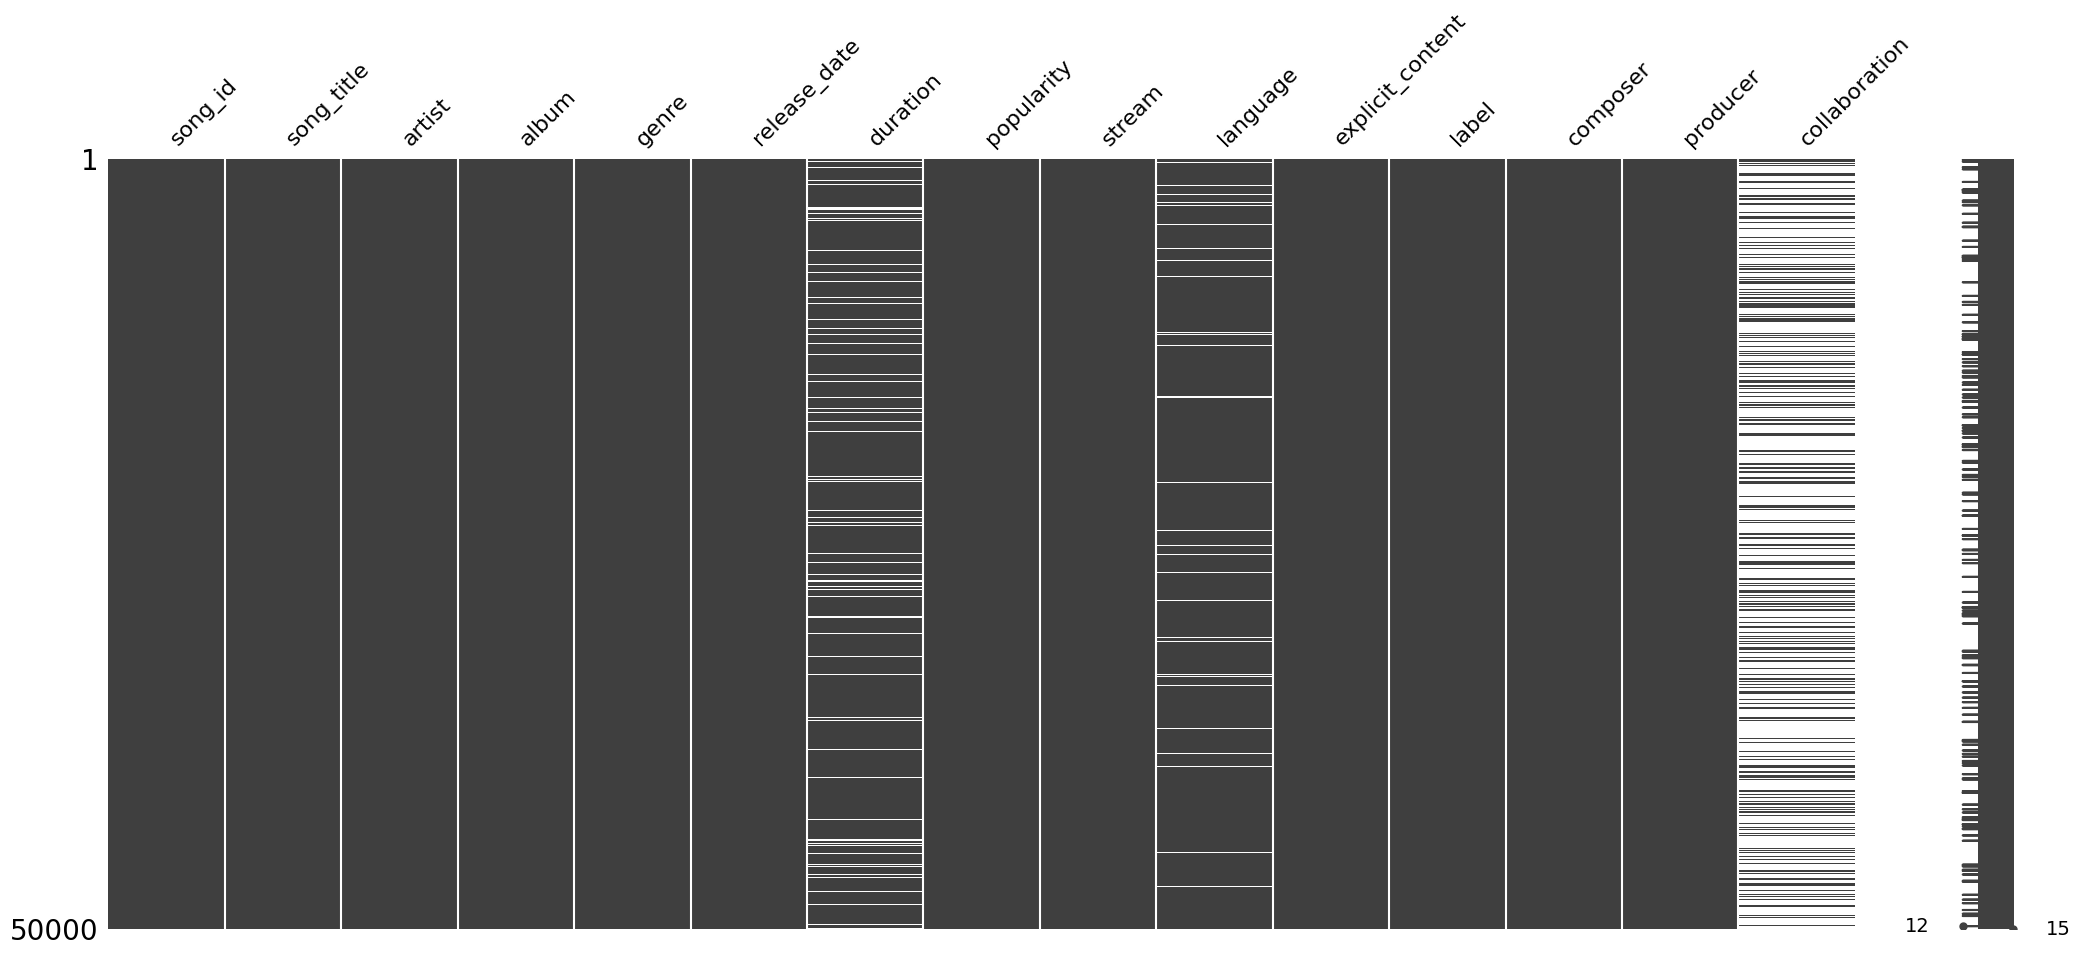

In [10]:
msno.matrix(df)

In [12]:
df.head(3)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN


In [22]:
df["song_title"] = df["song_title"].str.strip('.')

df["song_title"] = df["song_title"].str.title()

In [23]:
df.head(3)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space Executive Series,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price Last Painting,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN


In [24]:
df["album"] = df["album"].str.strip('.')

df["album"] = df["album"].str.title()

In [25]:
df.head(3)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space Executive Series,Sydney Clark,What,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price Last Painting,Connor Peters DDS,Nature Politics,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece,Anna Keith,Visit,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
